# Flaml (Fast and Lightweight AutoML) Time Series Forecast Demo

Restart runtime after installation (ignore errors).

In [1]:
!pip3 install "flaml[ts_forecast]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 9.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of prophet to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.30
    Uninstalling holidays-0.30:
      Successfully uninstalled holidays-0.30
  Attempting uninstall: prophet
    Found existing installa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML

### Import dataset

In [3]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### Preprocessing

The first column must to be continuous ```datetime64``` values

In [4]:
t = pd.to_datetime(df.year.astype('str') + '-' + df.month.astype('str'), format='%Y-%b')
df.insert(0, 'timestamp', t)
df = df.drop(['year', 'month'], axis=1)
df

,timestamp,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


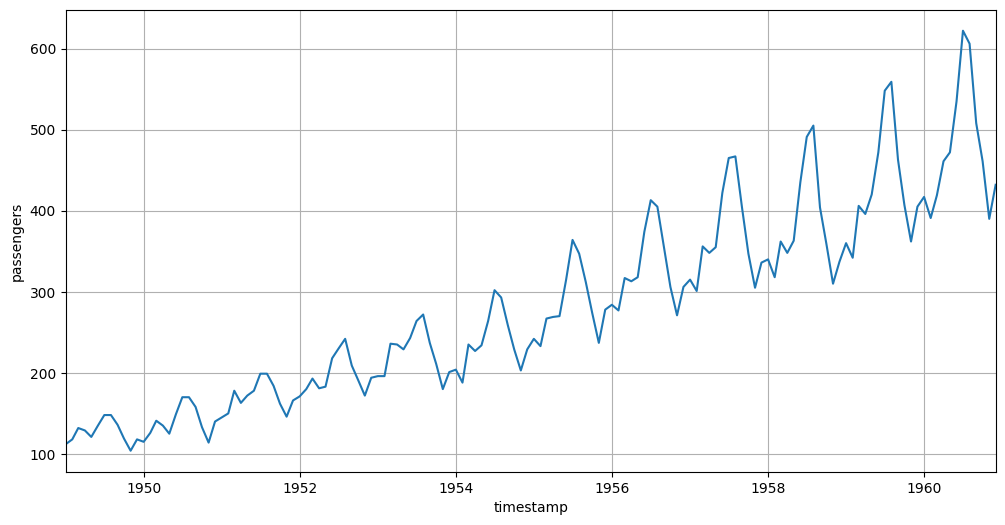

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='passengers')
plt.xlim([df.timestamp[0], df.timestamp[df.index.size-1]])
plt.grid(True)
plt.show()

### Train model

Use 20% data as test dataset

In [6]:
split = 0.2
split_index = int(df.index.size*(1-split))

train, test = df[:split_index], df[split_index:].drop(['passengers'], axis=1)

In [7]:
reg = AutoML()
reg.fit(dataframe=train, label='passengers', task='ts_forecast', split_type='time', estimator_list=['prophet', 'arima', 'sarimax'], period=36, time_budget=120)

[flaml.automl.logger: 08-15 02:52:37] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 08-15 02:52:37] {1700} INFO - Data split method: time
[flaml.automl.logger: 08-15 02:52:37] {1703} INFO - Evaluation method: cv


INFO:flaml.automl.task.generic_task:Using nsplits=2 due to data size limit.


[flaml.automl.logger: 08-15 02:52:37] {1801} INFO - Minimizing error metric: mape
[flaml.automl.logger: 08-15 02:52:37] {1911} INFO - List of ML learners in AutoML Run: ['prophet', 'arima', 'sarimax']
[flaml.automl.logger: 08-15 02:52:37] {2221} INFO - iteration 0, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/ybuojrb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/e_zmcakv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87882', 'data', 'file=/tmp/tmpmceju8a5/ybuojrb1.json', 'init=/tmp/tmpmceju8a5/e_zmcakv.json', 'output', 'file=/tmp/tmp_o6xkpib/prophet_model-20230815025238.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/gwc6n24s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/3ao1e1gg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:52:55] {2347} INFO - Estimated sufficient time budget=180481s. Estimated necessary time budget=180s.
[flaml.automl.logger: 08-15 02:52:55] {2394} INFO -  at 18.1s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:52:55] {2221} INFO - iteration 1, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/0i4tswqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/t3znk8eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15515', 'data', 'file=/tmp/tmpmceju8a5/0i4tswqc.json', 'init=/tmp/tmpmceju8a5/t3znk8eh.json', 'output', 'file=/tmp/tmpkrv9c0kw/prophet_model-20230815025255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/t10_8m0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/8vldxql1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:06] {2394} INFO -  at 28.4s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:06] {2221} INFO - iteration 2, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/u3lipsx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/9y60l41p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82967', 'data', 'file=/tmp/tmpmceju8a5/u3lipsx3.json', 'init=/tmp/tmpmceju8a5/9y60l41p.json', 'output', 'file=/tmp/tmpqqcwetim/prophet_model-20230815025306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/joq9nk1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/_b3_2rsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:09] {2394} INFO -  at 32.4s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:09] {2221} INFO - iteration 3, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/eujrq9kb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/wld6seti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95403', 'data', 'file=/tmp/tmpmceju8a5/eujrq9kb.json', 'init=/tmp/tmpmceju8a5/wld6seti.json', 'output', 'file=/tmp/tmpk6mcp3q8/prophet_model-20230815025310.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/52qxmyrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/69_zjhck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:15] {2394} INFO -  at 37.9s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:15] {2221} INFO - iteration 4, current learner arima


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[flaml.automl.logger: 08-15 02:53:15] {2394} INFO -  at 38.4s,	estimator arima's best error=0.1997,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:15] {2221} INFO - iteration 5, current learner arima
[flaml.automl.logger: 08-15 02:53:16] {2394} INFO -  at 38.7s,	estimator arima's best error=0.1997,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:16] {2221} INFO - iteration 6, current learner arima
[flaml.automl.logger: 08-15 02:53:16] {2394} INFO -  at 38.8s,	estimator arima's best error=0.1997,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:16] {2221} INFO - iteration 7, current learner arima
[flaml.automl.logger: 08-15 02:53:16] {2394} INFO -  at 38.9s,	estimator arima's best error=0.1997,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:16] {2221} INFO - iteration 8, current learner arima
[flaml.automl.logger: 08-15 02:53:16] {2394} INFO -  at 39.1s,	estimator arima's

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/38kx1pyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/zjtg27j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45837', 'data', 'file=/tmp/tmpmceju8a5/38kx1pyt.json', 'init=/tmp/tmpmceju8a5/zjtg27j0.json', 'output', 'file=/tmp/tmp2vh2lc2_/prophet_model-20230815025328.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/czdkz1fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/9ymee61c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:32] {2394} INFO -  at 54.8s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:32] {2221} INFO - iteration 16, current learner sarimax
[flaml.automl.logger: 08-15 02:53:32] {2394} INFO -  at 55.4s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:32] {2221} INFO - iteration 17, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/0gndyhc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/pfdpazv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27847', 'data', 'file=/tmp/tmpmceju8a5/0gndyhc6.json', 'init=/tmp/tmpmceju8a5/pfdpazv6.json', 'output', 'file=/tmp/tmp4sa_y6d1/prophet_model-20230815025333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/nswfsh58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/04xp7m4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:37] {2394} INFO -  at 60.0s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:37] {2221} INFO - iteration 18, current learner sarimax
[flaml.automl.logger: 08-15 02:53:38] {2394} INFO -  at 61.1s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:38] {2221} INFO - iteration 19, current learner sarimax
[flaml.automl.logger: 08-15 02:53:43] {2394} INFO -  at 65.8s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:43] {2221} INFO - iteration 20, current learner sarimax
[flaml.automl.logger: 08-15 02:53:43] {2394} INFO -  at 66.0s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:43] {2221} INFO - iteration 21, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/8fo899he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/nvr9qo1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67437', 'data', 'file=/tmp/tmpmceju8a5/8fo899he.json', 'init=/tmp/tmpmceju8a5/nvr9qo1b.json', 'output', 'file=/tmp/tmpgzhrojup/prophet_model-20230815025343.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/93k0q_yt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/c5ohk79_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:47] {2394} INFO -  at 70.1s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:47] {2221} INFO - iteration 22, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/ajjkwamu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/86ppedix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54948', 'data', 'file=/tmp/tmpmceju8a5/ajjkwamu.json', 'init=/tmp/tmpmceju8a5/86ppedix.json', 'output', 'file=/tmp/tmp1d4808a2/prophet_model-20230815025347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/_72td8ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/b05w84d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:53:52] {2394} INFO -  at 74.4s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:52] {2221} INFO - iteration 23, current learner sarimax
[flaml.automl.logger: 08-15 02:53:56] {2394} INFO -  at 79.3s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:56] {2221} INFO - iteration 24, current learner sarimax
[flaml.automl.logger: 08-15 02:53:58] {2394} INFO -  at 80.7s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:58] {2221} INFO - iteration 25, current learner arima
[flaml.automl.logger: 08-15 02:53:58] {2394} INFO -  at 81.1s,	estimator arima's best error=0.1398,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:53:58] {2221} INFO - iteration 26, current learner sarimax
[flaml.automl.logger: 08-15 02:53:59] {2394} INFO -  at 82.3s,	e

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/1nes8tml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/xvqo87lc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94363', 'data', 'file=/tmp/tmpmceju8a5/1nes8tml.json', 'init=/tmp/tmpmceju8a5/xvqo87lc.json', 'output', 'file=/tmp/tmpe3yd2r4a/prophet_model-20230815025402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/158_2e6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/hfau6cc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:54:05] {2394} INFO -  at 88.4s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:05] {2221} INFO - iteration 30, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/_7ekc8ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/m4fsktat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4359', 'data', 'file=/tmp/tmpmceju8a5/_7ekc8ab.json', 'init=/tmp/tmpmceju8a5/m4fsktat.json', 'output', 'file=/tmp/tmp060xfjqe/prophet_model-20230815025405.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/hp88kls7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/epcxyu50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

[flaml.automl.logger: 08-15 02:54:11] {2394} INFO -  at 93.5s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:11] {2221} INFO - iteration 31, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/c39myyha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/aj6pukzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70865', 'data', 'file=/tmp/tmpmceju8a5/c39myyha.json', 'init=/tmp/tmpmceju8a5/aj6pukzl.json', 'output', 'file=/tmp/tmpv5u5zs04/prophet_model-20230815025411.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/l3vyuy2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/qhksi84j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:54:15] {2394} INFO -  at 97.8s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:15] {2221} INFO - iteration 32, current learner sarimax
[flaml.automl.logger: 08-15 02:54:16] {2394} INFO -  at 98.5s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:16] {2221} INFO - iteration 33, current learner prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/48vqdvdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/5vrt9zge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53836', 'data', 'file=/tmp/tmpmceju8a5/48vqdvdj.json', 'init=/tmp/tmpmceju8a5/5vrt9zge.json', 'output', 'file=/tmp/tmpcza39rj6/prophet_model-20230815025416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:54:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/ue591e5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/ktxt6e0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:54:20] {2394} INFO -  at 102.9s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:20] {2221} INFO - iteration 34, current learner sarimax
[flaml.automl.logger: 08-15 02:54:24] {2394} INFO -  at 106.9s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:24] {2221} INFO - iteration 35, current learner sarimax
[flaml.automl.logger: 08-15 02:54:25] {2394} INFO -  at 108.0s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:25] {2221} INFO - iteration 36, current learner sarimax
[flaml.automl.logger: 08-15 02:54:26] {2394} INFO -  at 108.5s,	estimator sarimax's best error=0.0635,	best estimator prophet's best error=0.0441
[flaml.automl.logger: 08-15 02:54:26] {2221} INFO - iteration 37, current learner sarimax
[flaml.automl.logger: 08-15 02:54:30] {2394} INFO -  at 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/qjb5d49u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/1n5noo6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18105', 'data', 'file=/tmp/tmpmceju8a5/qjb5d49u.json', 'init=/tmp/tmpmceju8a5/1n5noo6s.json', 'output', 'file=/tmp/tmpvfxkt2cm/prophet_model-20230815025430.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:54:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/82wg86n8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/yf_29rbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-p

[flaml.automl.logger: 08-15 02:54:39] {2394} INFO -  at 122.1s,	estimator prophet's best error=0.0441,	best estimator prophet's best error=0.0441


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/ssmftxvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmceju8a5/isxl7ted.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70434', 'data', 'file=/tmp/tmpmceju8a5/ssmftxvr.json', 'init=/tmp/tmpmceju8a5/isxl7ted.json', 'output', 'file=/tmp/tmpvg80r_wy/prophet_model-20230815025439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


[flaml.automl.logger: 08-15 02:54:39] {2630} INFO - retrain prophet for 0.1s
[flaml.automl.logger: 08-15 02:54:39] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x797ca452da50>
[flaml.automl.logger: 08-15 02:54:39] {1941} INFO - fit succeeded
[flaml.automl.logger: 08-15 02:54:39] {1942} INFO - Time taken to find the best model: 59.9666109085083


In [8]:
print('Best ML leaner:', reg.best_estimator)
print('Best hyperparmeter config:', reg.best_config)

Best ML leaner: prophet
Best hyperparmeter config: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 9.907664630875948, 'holidays_prior_scale': 6.372933414610401, 'seasonality_mode': 'multiplicative'}


### Predict values

If the model is *Prophet*, pass a DataFrame with timestamps to the ```predict()``` method.

If the model is *ARIMA* or *SARIMAX*, pass a number (number of future values to be predicted).

In [9]:
if reg.best_estimator == 'prophet':
  predicted = reg.predict(test)  # prophet
else:
  reg.predict(test.index.size)  # arima/sarimax

predicted.index = test.index  # use test DataFrame index
predicted

115    482.267116
116    426.594946
117    370.621843
118    322.434623
119    366.135533
120    374.004900
121    364.340628
122    412.766363
123    402.368788
124    412.346211
125    472.393381
126    538.117325
127    518.953099
128    462.862430
129    400.857992
130    345.520369
131    395.672801
132    404.131999
133    397.436171
134    455.624951
135    440.521580
136    441.073473
137    516.895512
138    562.328241
139    567.037571
140    492.574435
141    429.698420
142    380.227202
143    423.918115
Name: yhat, dtype: float64

In [10]:
from sklearn.metrics import mean_absolute_error

print('Prection MAE:', mean_absolute_error(df[split_index:].passengers, predicted).round(3))

Prection MAE: 18.163


### Predict future new values

In [11]:
new_test = pd.DataFrame({'timestamp': pd.date_range(start='1960-12-01', end='1963-12-01', freq='MS')})

if reg.best_estimator == 'prophet':
  new_predicted = reg.predict(new_test)
else:
  reg.predict(new_test.index.size)

new_predicted

0     423.918115
1     432.280077
2     411.985534
3     484.972809
4     469.744283
5     473.716717
6     550.659202
7     608.140706
8     603.865227
9     528.835030
10    460.027661
11    403.256008
12    453.329247
13    462.287896
14    445.148286
15    513.708596
16    498.678401
17    506.556310
18    584.099640
19    654.726706
20    640.209175
21    565.340277
22    490.362856
23    425.897975
24    482.852662
25    492.429610
26    478.935336
27    541.814351
28    527.337054
29    539.601715
30    617.231797
31    702.074821
32    676.055836
33    602.090510
34    520.695084
35    448.163106
36    512.501528
Name: yhat, dtype: float64

### Visualization of Test and Future Predictions

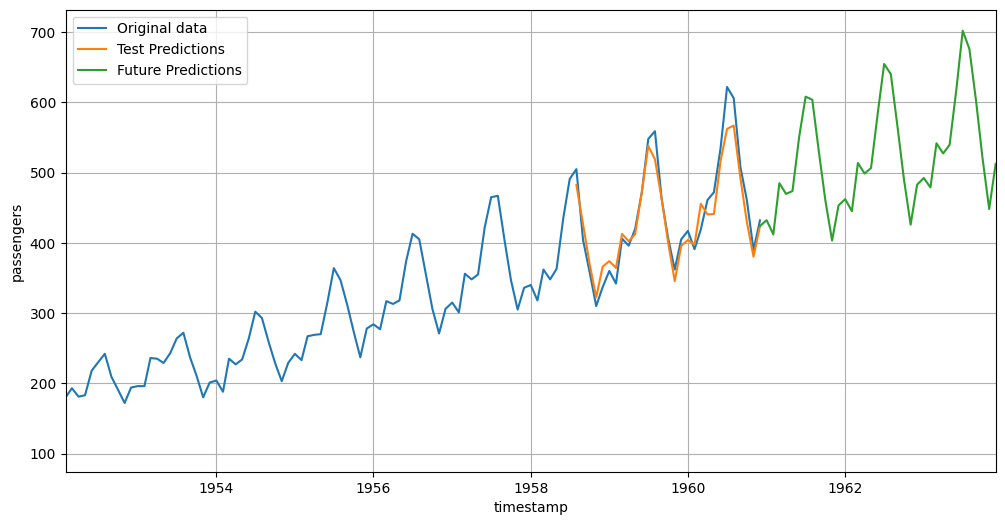

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='passengers', label='Original data')
sns.lineplot(x=test.timestamp, y=predicted, label='Test Predictions')
sns.lineplot(x=new_test.timestamp, y=new_predicted, label='Future Predictions')
plt.xlim([df.timestamp[new_test.index.size], new_test.timestamp[new_test.index.size-1]])
plt.grid(True)
plt.show()